In [1]:
import pandas as p 
import numpy as n
import matplotlib.pyplot as plt
import seaborn as s

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=p.read_csv('human.csv')

In [4]:
data.columns

Index(['sr', 'rr', 't', 'lm', 'bo', 'rem', 'sr.1', 'hr', 'sl'], dtype='object')

In [5]:
df=data.dropna()
df = df.rename({'sr.1':'srh'},axis=1)

In [6]:
df

,sr,rr,t,lm,bo,rem,srh,hr,sl
0,93.800,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.640,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.000,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.760,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.120,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0
...,...,...,...,...,...,...,...,...,...
625,69.600,20.960,92.960,10.960,90.960,89.80,3.440,62.40,2
626,48.440,17.376,98.064,6.752,96.376,73.76,8.376,53.44,0
627,97.504,27.504,86.880,17.752,84.256,101.88,0.000,78.76,4
628,58.640,19.728,95.728,9.728,94.592,84.32,6.728,59.32,1


In [7]:
df.columns

Index(['sr', 'rr', 't', 'lm', 'bo', 'rem', 'srh', 'hr', 'sl'], dtype='object')

In [8]:
df.head()

,sr,rr,t,lm,bo,rem,srh,hr,sl
0,93.80,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.64,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.00,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.76,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.12,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0


In [9]:
df.shape

(630, 9)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sr      630 non-null    float64
 1   rr      630 non-null    float64
 2   t       630 non-null    float64
 3   lm      630 non-null    float64
 4   bo      630 non-null    float64
 5   rem     630 non-null    float64
 6   srh     630 non-null    float64
 7   hr      630 non-null    float64
 8   sl      630 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 44.4 KB


In [11]:
df

,sr,rr,t,lm,bo,rem,srh,hr,sl
0,93.800,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.640,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.000,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.760,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.120,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0
...,...,...,...,...,...,...,...,...,...
625,69.600,20.960,92.960,10.960,90.960,89.80,3.440,62.40,2
626,48.440,17.376,98.064,6.752,96.376,73.76,8.376,53.44,0
627,97.504,27.504,86.880,17.752,84.256,101.88,0.000,78.76,4
628,58.640,19.728,95.728,9.728,94.592,84.32,6.728,59.32,1


In [12]:
#preprocessing, split test and dataset, split response variable
X = df.drop(labels='sl', axis=1)
#Response variable
y = df.loc[:,'sl']

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1, stratify=y)
print("Number of training dataset : ", len(X_train))
print("Number of test dataset     : ", len(X_test))
print("Total number of dataset    : ", len(X_train)+len(X_test))

Number of training dataset :  504
Number of test dataset     :  126
Total number of dataset    :  630


In [14]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [15]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score

dt = AdaBoostClassifier()

dt.fit(X_train,y_train)

predictDT = dt.predict(X_test)

print("")
print('Classification report of AdaBoostClassifier Result is:')
print("")
print(classification_report(y_test,predictDT))
print("")

cm=confusion_matrix(y_test,predictDT)
print('Confusion Matrix result of AdaBoostClassifier is:\n',cm)
print("")

sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity )
print("")
specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)
print("")

accuracy = cross_val_score(dt, X, y, scoring='accuracy')
print('Cross validation test results of accuracy:')
print(accuracy)


print("")
print("Accuracy Result of AdaBoostClassifier is:",accuracy.mean() * 100)
DTC=accuracy.mean() * 100


Classification report of AdaBoostClassifier Result is:

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        25
           1       0.31      0.96      0.47        25
           2       0.00      0.00      0.00        25
           3       0.00      0.00      0.00        26
           4       1.00      0.92      0.96        25

    accuracy                           0.57       126
   macro avg       0.45      0.58      0.48       126
weighted avg       0.45      0.57      0.48       126


Confusion Matrix result of AdaBoostClassifier is:
 [[25  0  0  0  0]
 [ 1 24  0  0  0]
 [ 0 25  0  0  0]
 [ 0 26  0  0  0]
 [ 0  2  0  0 23]]

Sensitivity :  1.0

Specificity :  0.96

Cross validation test results of accuracy:
[0.58730159 0.58730159 0.5952381  0.5952381  0.6031746 ]

Accuracy Result of AdaBoostClassifier is: 59.36507936507937


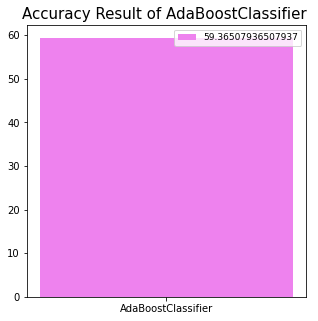

In [16]:
def Bar_Chart():
    import matplotlib.pyplot as plt
    data=[DTC]
    alg="AdaBoostClassifier"
    plt.figure(figsize=(5,5))
    b=plt.bar(alg,data,color=("Violet"))
    plt.title("Accuracy Result of AdaBoostClassifier ",fontsize=15)
    plt.legend(b,data,fontsize=9)
Bar_Chart()

In [17]:
TP = cm[0][0]
FP = cm[1][0]
FN = cm[0][1]
TN = cm[1][1]
print("True Positive :",TP)
print("True Negative :",TN)
print("False Positive :",FP)
print("False Negative :",FN)
print("")
TPR = TP/(TP+FN)
TNR = TN/(TN+FP)
FPR = FP/(FP+TN)
FNR = FN/(TP+FN)
print("True Positive Rate :",TPR)
print("True Negative Rate :",TNR)
print("False Positive Rate :",FPR)
print("False Negative Rate :",FNR)
print("")
PPV = TP/(TP+FP)
NPV = TN/(TN+FN)
print("Positive Predictive Value :",PPV)
print("Negative predictive value :",NPV)

True Positive : 25
True Negative : 24
False Positive : 1
False Negative : 0

True Positive Rate : 1.0
True Negative Rate : 0.96
False Positive Rate : 0.04
False Negative Rate : 0.0

Positive Predictive Value : 0.9615384615384616
Negative predictive value : 1.0


Confusion matrix:
[[25  0  0  0  0]
 [ 1 24  0  0  0]
 [ 0 25  0  0  0]
 [ 0 26  0  0  0]
 [ 0  2  0  0 23]]


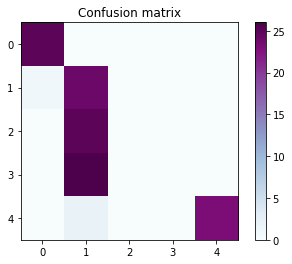

In [18]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.BuPu):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

cm1=confusion_matrix(y_test, predictDT)
print('Confusion matrix:')
print(cm)
plot_confusion_matrix(cm)